### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptaran consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)


# Tarea 1: Análisis de señales usando la FFT

Para esta tarea considere la señal adjunta guardada en el archivo `elefante_ruidoso.npy`

Esta señal tiene valores complejos y fue muestreada a $100$ [Hz]

In [199]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
with open('elefante_ruidoso.npy', 'rb') as f:
    x = np.load(f)

In [200]:
#Frecuencia de muestreo es de 100[Hz]
Fs = 100

## Pregunta 1: Análisis preliminar (20%)

Responda
- ¿Cuántas muestras tiene la señal? ¿Cuál es la duración o largo temporal de la señal? 
- ¿Cuál es la mayor frecuencia que podemos estudiar usando transformada de Fourier en este caso? Fundamente su respuesta

Muestre 

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria de la señal en función de la parte real de la misma

Describa y clasifique la señal según los comportamientos que observa

In [201]:
#La señal tiene 2000 muestras
print(len(x))

2000


In [202]:
#la señal tienen una duracion de 20[s]
print(len(x)/Fs)

20.0


In [203]:
#la mayor frecuencia que podemos estudiar usando transformada de Fourier en este caso es < Fs/2
#Fs/2 es la frecuencia de Nyquist
print(Fs/2)

#fmax < que la frecuencia de Nyquist


50.0


<IPython.core.display.Javascript object>


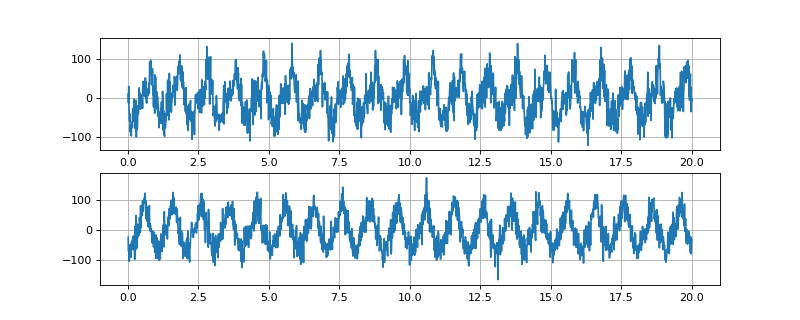

In [264]:
#grafiaca de parte real e imaginaria
fig, ax = plt.subplots(2, 1, figsize=(10, 4), dpi=80)
ax[0].grid()
ax[1].grid()
ax[0].plot(np.arange(1,2001)*0.01, x.real)
ax[1].plot(np.arange(1,2001)*0.01, x.imag)

<IPython.core.display.Javascript object>


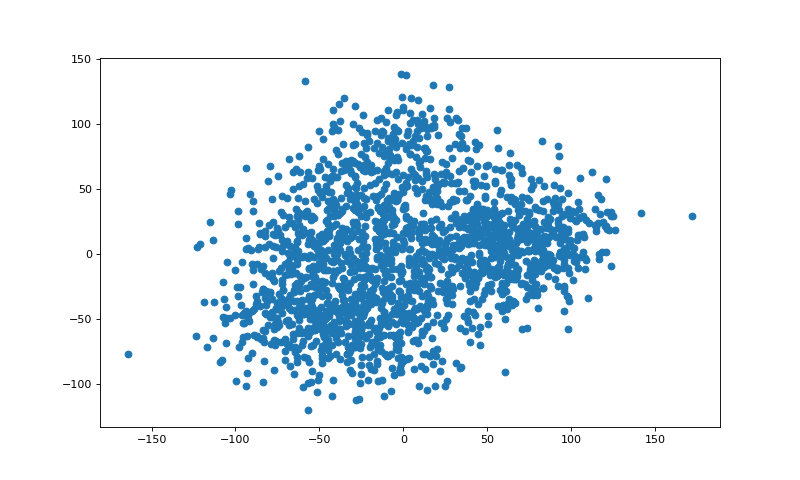

In [265]:
#nube de puntos
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=80)
ax.scatter(x=x.imag, y=x.real)

In [266]:
#Parece que es una señal ciclica, sinusoidal, tambien podria ser diente de sierra

In [267]:
Audio(x, rate=Fs)

/home/valverde/miniconda3/lib/python3.8/site-packages/IPython/lib/display.py:157: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


## Pregunta 2: Análisis de Fourier (40%)

- Escriba una función que reciba la señal y retorne el espectro de amplitud, el espectro de fase y las frecuencias asociadas a la señal. 
- Muestre dos gráficos con el espectro de amplitud y espectro de fase en función de la frecuencia, respectivamente. Comente sobre lo que observa
- Escriba una función que reciba un número entero $M$ y que retorne un espectro de magnitud modificado donde los $M$ componentes mayores se mantienen y todos los demás se hacen igual a cero, retorne también el índice de los $M$ componentes mayores
- Muestre graficamente el espectro de magnitud modificado con $M=7$. Imprima los valores de las **frecuencias, amplitudes y fases** de los $M$ componentes ordenados en orden descedente según su amplitud


In [268]:
import scipy.fft as sfft
S = sfft.fft(x)

In [269]:
#Frecuencia (freqs)
freqs = sfft.fftfreq(len(S),1/Fs) 

In [270]:
#Espectro de Amplitud (SA)
SA = np.absolute(S)

#Espectro de Fase(SP)
SP = np.angle(S)

<IPython.core.display.Javascript object>


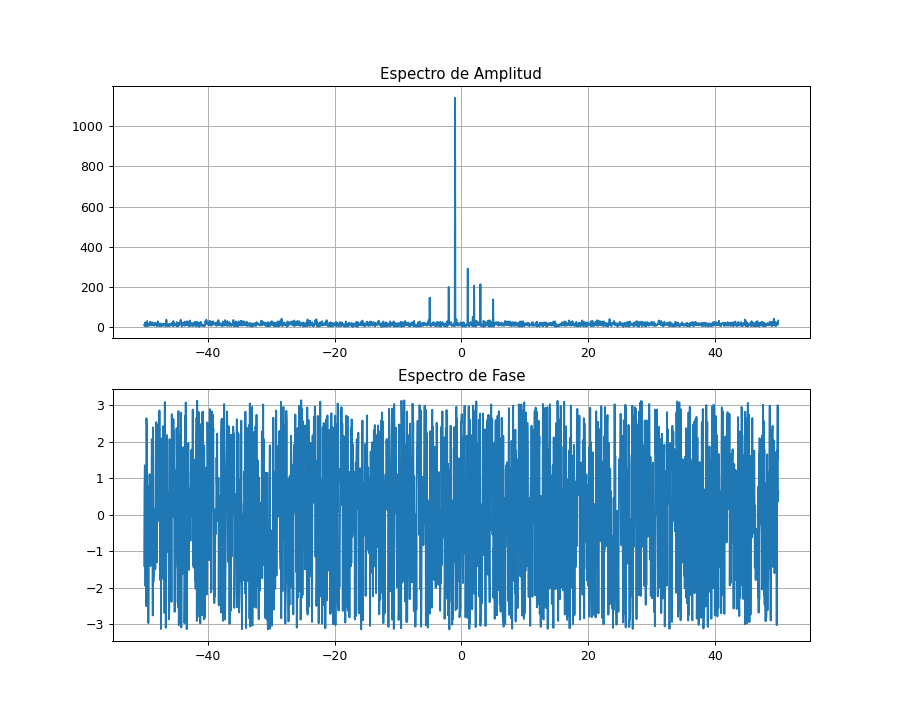

Text(0.5, 1.0, 'Espectro de Fase')

In [271]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), dpi=90)
ax[0].grid()
ax[1].grid()
ax[0].plot(sfft.fftshift(freqs), sfft.fftshift(SA)/100)
ax[0].set_title("Espectro de Amplitud")
ax[1].plot(sfft.fftshift(freqs), sfft.fftshift(SP))
ax[1].set_title("Espectro de Fase")


In [272]:
M=7

In [281]:
def espectroDeMagnitudModificado(M,SA):
    mask = np.argsort(SA)[-M:]
    SA_Limpia = [0]*len(SA)
    for i in mask:
        SA_Limpia[i]=SA[i]
    return SA_Limpia, mask
SA_Limpia,mask=espectroDeMagnitudModificado(M,SA)
mask

array([ 100, 1900, 1960,   40,   60,   20, 1980])

<IPython.core.display.Javascript object>


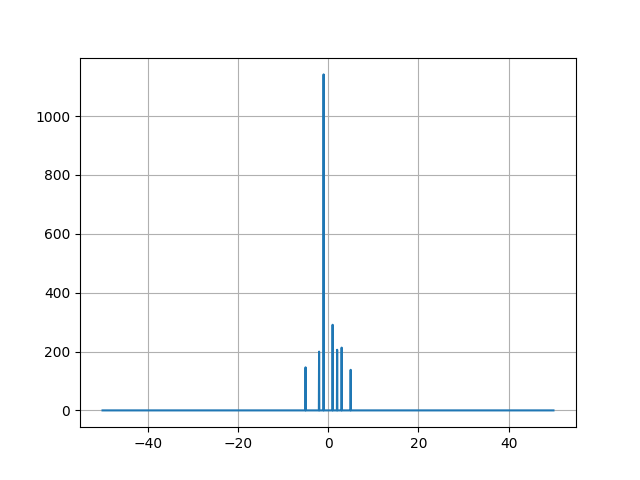

In [282]:
plt.figure()
plt.grid()
plt.plot(sfft.fftshift(freqs), sfft.fftshift(SA_Limpia)/100)

In [283]:
#Valores de las frecuencias, amplitudes 
#y fases de los 𝑀 componentes ordenados en orden descedente según su amplitud
mask.sort()
for i in mask:
    print("__________________________")
    print("SA = ", SA[i])
    print("SP = ", SP[i])
    print("freqs = ", freqs[i])
    print("__________________________")


__________________________
SA =  29095.711084968076
SP =  -2.8286161094867093
freqs =  1.0
__________________________
__________________________
SA =  20598.95161543908
SP =  1.1360540070406129
freqs =  2.0
__________________________
__________________________
SA =  21326.97306032803
SP =  -3.0399687348263478
freqs =  3.0
__________________________
__________________________
SA =  13788.414604929732
SP =  0.04120390089895232
freqs =  5.0
__________________________
__________________________
SA =  14630.202810017134
SP =  0.1072168190693926
freqs =  -5.0
__________________________
__________________________
SA =  19964.34184965835
SP =  -1.9964989591343765
freqs =  -2.0
__________________________
__________________________
SA =  114172.07496405445
SP =  -1.2988694557983236
freqs =  -1.0
__________________________




## Pregunta 3: Reconstrucción (40%)

Use la transformada de Fourier inversa para reconstruir la señal en base al espectro de amplitud modificado y el espectro de fase. 

Para $M=[100, 10, 7, 5, 3, 1]$ (puede usar otros valores si lo considera necesario en su análisis) muestre

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal reconstruida en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria en función de la parte real de la señal reconstruida

Describa y comente lo que observa, en particular compare cada resultado con el caso `M=len(x)` (caso original) y discuta sobre lo que ocurre para $M>7$, $M=7$ y $M<7$ con respecto al ruido y la información relevante de la señal ¿Pueden ver al elefante en el ruido? 

<IPython.core.display.Javascript object>


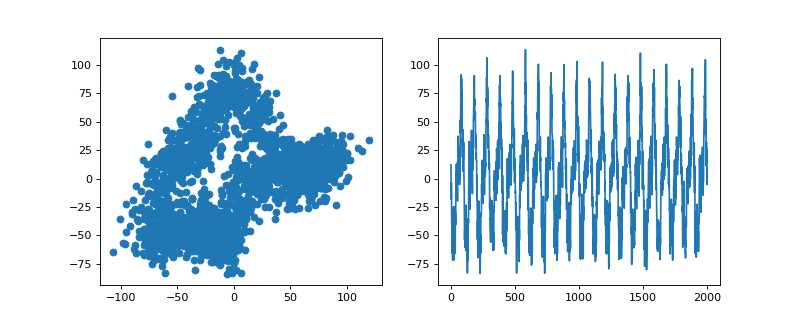

/home/valverde/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


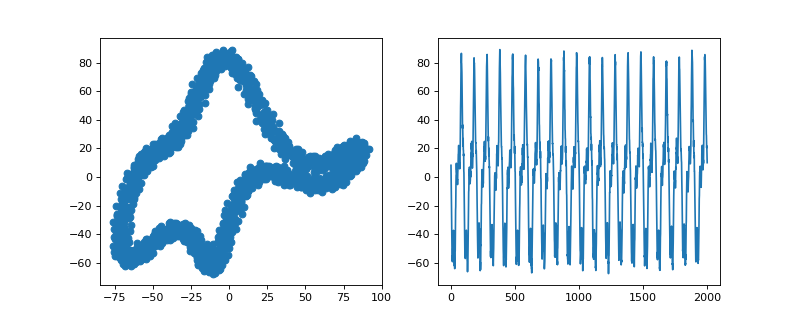

/home/valverde/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


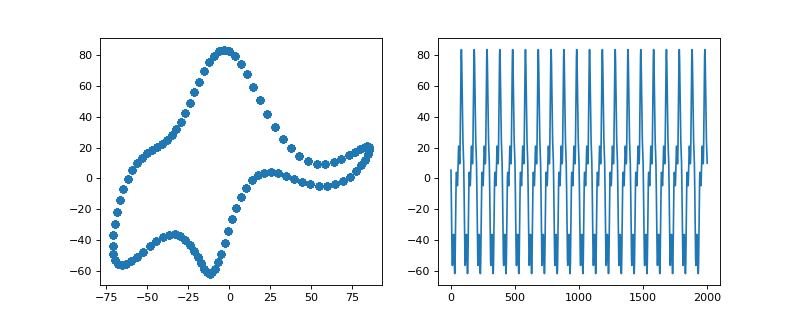

/home/valverde/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


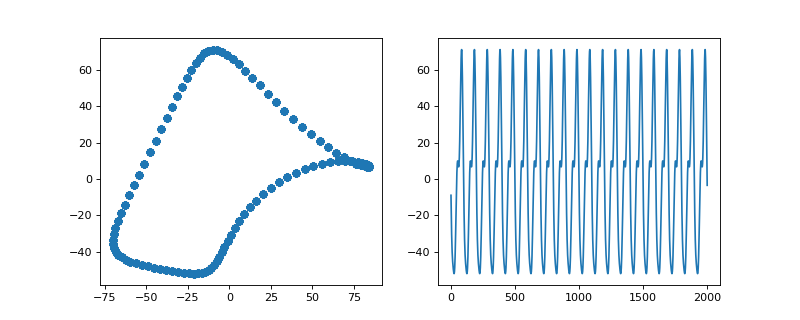

/home/valverde/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


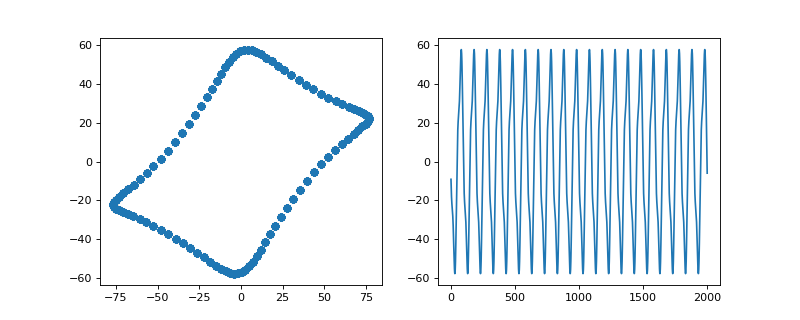

/home/valverde/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


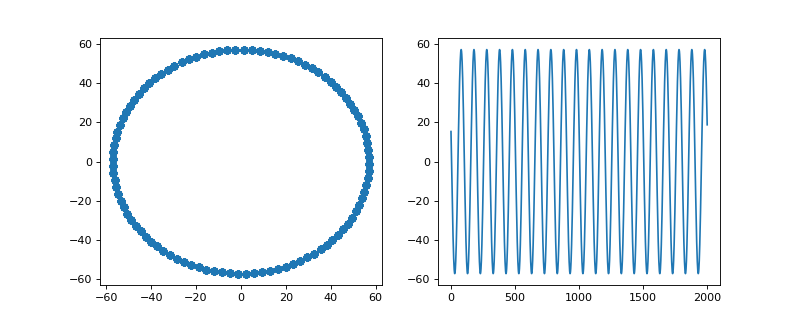

/home/valverde/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


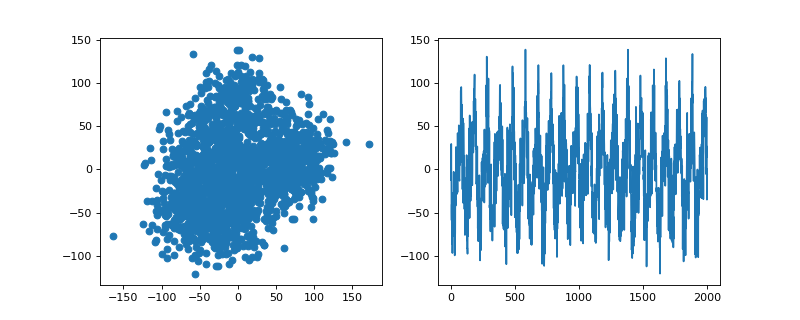

/home/valverde/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [299]:
M=[100,10,7,5,3,1,len(x)]
for i in M:
    SA_Limpia,mask=espectroDeMagnitudModificado(i,SA)
    SA_Limpia_ifft = sfft.ifft(SA_Limpia*np.exp(1j*SP))
    fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=80)
    ax[0].scatter( x=SA_Limpia_ifft.imag,y=SA_Limpia_ifft.real)
    ax[1].plot(SA_Limpia_ifft)

-Al disminuir el M, la grafica se va convirtiendo en una sinusoidal

-Al llegar a un M = 7 se puede apreciar la grafica como seria sin ningun tipo de ruido

-Mientras va aumentando el M va apareceindo ruido

-Cuando llegamos al caso original obtenemos la grafica con todo el ruido

## Indicaciones

- Puede usar las funciones `np.real` e `np.imag` para obtener la parte real e imaginaria de un número complejo, respectivamente
- Si `x` y `y` son la parte real e imaginaria de un número complejo, puedes reconstruir el número complejo con `c = x + 1j*y`
- Si `rho` y `phi` son la amplitud y ángulo de un número complejo, puedes reconstruir el número complejo usando `c = rho*np.exp(1j*phi)`
- Recuerden que un slice de un `ndarray` no es una copia sino una referencia. Para crear copias use el atributo `.copy()`
- Usa `scipy.fft.fft` y `scipy.fft.ifft` para calcular la FFT directa e inversa, respectivamente

## Éxito!

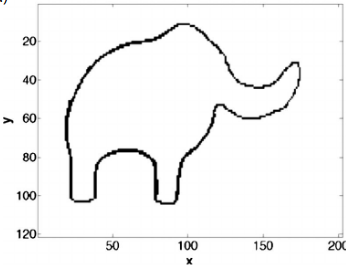